In [5]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
import seaborn as sns
import torch
from PIL import Image
import io
from tqdm import tqdm
from pathlib import Path
from scipy import stats
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import matplotlib.font_manager as fm

font_path = "/home/stud/ghuang/.fonts/Arial.ttf"  # Adjust the font name/path as needed
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = [font_prop.get_name(), "DejaVu Sans"]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0000e+00, 1.0000e+00, 7.7344e-01,  ..., 1.6689e-04, 1.2875e-04,
         1.2875e-04],
        [2.0000e+00, 2.0000e+00, 1.5469e+00,  ..., 3.3379e-04, 2.5749e-04,
         2.5749e-04],
        ...,
        [2.7000e+01, 2.7000e+01, 2.0875e+01,  ..., 4.5166e-03, 3.4790e-03,
         3.4790e-03],
        [2.8000e+01, 2.8000e+01, 2.1625e+01,  ..., 4.6692e-03, 3.6011e-03,
         3.6011e-03],
        [2.9000e+01, 2.9000e+01, 2.2375e+01,  ..., 4.8523e-03, 3.7384e-03,
         3.7384e-03]]) torch.Size([30, 72])


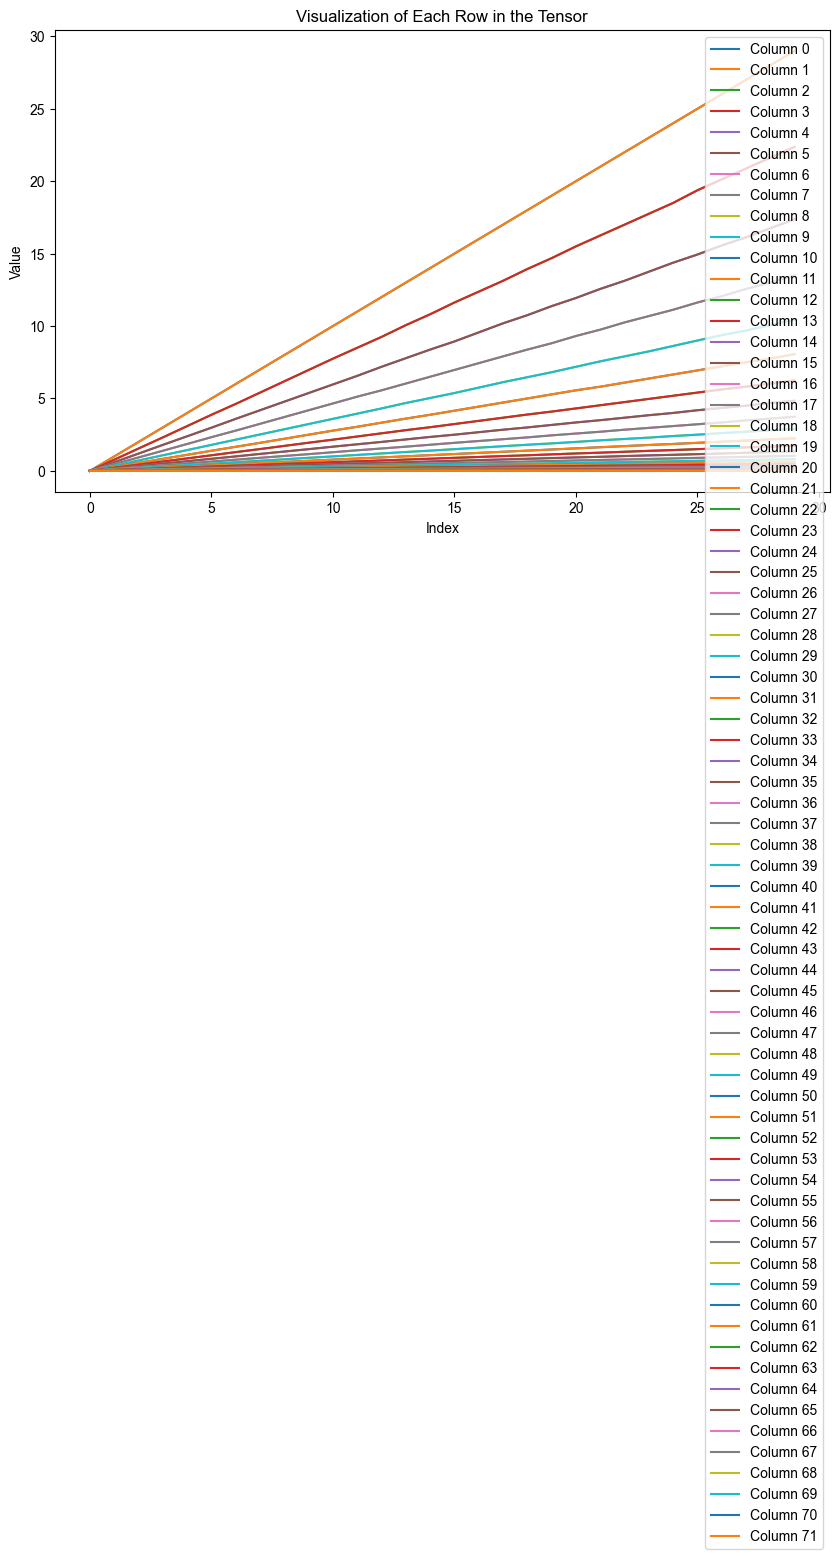

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

freqs = torch.load("freqs.pt").cpu().to(dtype=torch.float32)
print(freqs, freqs.shape)

freqs_np = freqs.numpy()

plt.figure(figsize=(10, 6))
for i, row in enumerate(freqs_np):
    plt.plot(row, label=f"Row {i}")

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Visualization of Each Row in the Tensor")
plt.legend()
plt.show()

[[  0.   0.   0.   0.   0.   0.   0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]

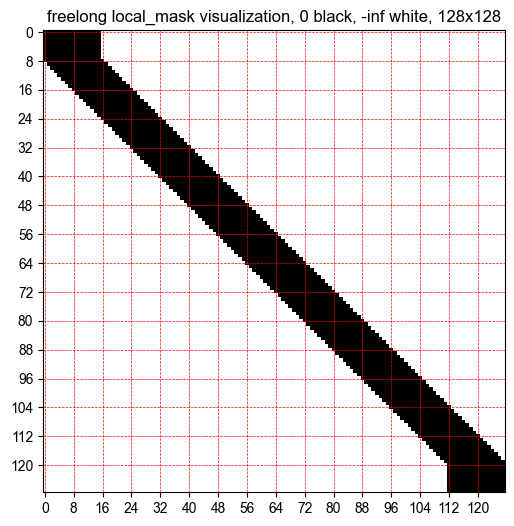

In [31]:
import torch
import matplotlib.pyplot as plt
import numpy as np

attention_attention = torch.load("attention_mask_attention.pt")
local_mask = torch.load("local_mask.pt")

array = local_mask.cpu().numpy()
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(array[100:, 100:])
# Normalize values for visualization
# -inf -> white (1), 0 -> black (0), others mapped to [0,1]
normalized_array = np.where(array == -np.inf, 1, array)  # Map -inf to 1
normalized_array = np.where(normalized_array == 0, 0, normalized_array)  # Keep 0 as 0
normalized_array = np.clip(normalized_array, 0, 1)  # Clip other values to [0,1]

# Plot the tensor
plt.figure(figsize=(6, 6))
plt.imshow(normalized_array, cmap='gray', interpolation='nearest')

plt.grid(True, which='both', color='red', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, 128, 8))  # Grid every 8 pixels
plt.yticks(np.arange(0, 128, 8))

plt.title("freelong local_mask visualization, 0 black, -inf white, 128x128")
plt.show()

tensor([[0., 0., 0.,  ..., -inf, -inf, -inf],
        [0., 0., 0.,  ..., -inf, -inf, -inf],
        [0., 0., 0.,  ..., -inf, -inf, -inf],
        ...,
        [-inf, -inf, -inf,  ..., 0., 0., 0.],
        [-inf, -inf, -inf,  ..., 0., 0., 0.],
        [-inf, -inf, -inf,  ..., 0., 0., 0.]])


TypeError: Invalid shape (7200, 16, 30, 30) for image data

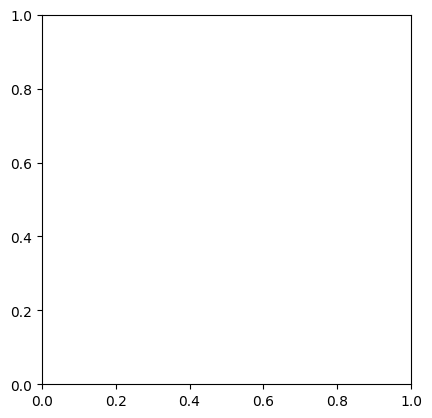

In [ ]:
import torch
import matplotlib.pyplot as plt
import xformers.ops

# Example small sequence (for visualization)
N = 200  # Total tokens
B = 4   # Single batch
block_size = 16
mask = [block_size, block_size, block_size, block_size] # Define block sizes

# Create the block diagonal mask
attn_bias = xformers.ops.fmha.BlockDiagonalMask.from_seqlens([N] * B, mask)
attn_bias = attn_bias.materialize((N * B, sum(mask)))

# Manually create a full mask for visualization
dense_mask = torch.zeros(N, N)
for i in range(0, N, block_size):
    dense_mask[i:i+block_size, i:i+block_size] = 1  # Enable attention within blocks


temporal_causal_mask = torch.full((7200, 16, 30, 30), float('-inf'))
temporal_causal_mask[:, :, :15, :15] = 0
temporal_causal_mask[:, :, 15:, 15:] = 0


print(attn_bias)
# Plot the mask
plt.imshow(temporal_causal_mask.numpy()[0, 0, :, :], cmap="gray")
plt.title("Block Diagonal Attention Mask")
plt.show()


In [15]:

# attention_map_path = "/home/stud/ghuang/Open-Sora/samples/samples/attention_maps_bird_flying_no_attn_bias"
# attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_cats_grass/"
# attention_map_path = "/home/stud/ghuang/Open-Sora/samples/samples/attention_maps_girl_bike_no_attn_bias"
# attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_girl_bike_50_denoising_steps_4s"
# attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_girl_bike_100_denoising_steps_4s"
# attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_girl_bike_20_denoising_steps_4s"
category = "egg_rock"
# attention_map_path = "/home/stud/ghuang/Open-Sora/samples/samples/attention_maps_scene_flash_two"
# attention_map_path = "/home/stud/ghuang/Open-Sora/samples/samples/attention_maps_scene_flash_three"
# attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_egg_rock_2s"
# attention_map_path = "/home/stud/ghuang/Open-Sora/samples/samples/attention_maps_scene_flash_one"
# attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_bird_lake"
# attention_map_path = "/home/stud/ghuang/Open-Sora/samples/samples/attention_maps_boy_beach"
# attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_egg_rock/"
attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_egg_rock_remove_temporal_block_rope_last_1.0"
# attention_map_path = "/nfs/data8/liao/ghuang/visualization/attn_maps_dog_mirror"
# attention_map_path = "/home/stud/ghuang/Open-Sora/samples/samples/attn_maps_girl_bike_align_7"
# attention_map_path = "/mnt/data8/liao/ghuang/visualization/attn_maps_girl_bike_50_denoising_steps" # this is 8s video
# attention_map_path = "/home/stud/ghuang/Open-Sora/samples/samples/attn_maps_girl_bike_align_condition_7"

# TODO: whether the '_' is used as the padding token
# scene_flash_one
# tokens = ['▁', 'a', '▁bird', '▁', 'f', 'lies', '▁in', '▁the', '▁sky', '.', '▁the', '▁scene', '▁then', '▁transition', 'e', 'd', '▁to', '▁', 'a', '▁ball', '▁rolling', '▁on', '▁the', '▁grass', 'l', 'and', '.', '▁then', '▁the', '▁scene', '▁transition', 'e', 'd', '▁to', '▁', 'a', '▁cat', '▁lying', '▁in', '▁the', '▁room', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# scene_flash_three
# tokens = ['▁', 'a', '▁man', '▁is', '▁sitting', '▁in', '▁the', '▁room', '.', '▁the', '▁scene', '▁then', '▁becomes', '▁', 'a', '▁squirrel', '▁running', '▁on', '▁the', '▁tree', '.', '▁then', '▁the', '▁scene', '▁flash', 'e', 'd', '▁into', '▁fire', '▁floating', '▁on', '▁the', '▁water', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']

# tokens = ['▁an', '▁egg', '▁hits', '▁on', '▁', 'a', '▁hard', '▁rock', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# tokens = ['▁the', '▁bird', '▁is', '▁flying', '▁above', '▁', 'a', '▁lake', '.', '▁and', '▁then', '▁it', '▁', 'f', 'lies', '▁over', '▁', 'a', '▁green', '▁forest', '.', '▁and', '▁then', '▁it', '▁passes', '▁through', '▁', 'a', '▁golden', '▁grass', 'l', 'and', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# tokens = ['▁', 'a', '▁bird', '▁', 'f', 'lies', '▁in', '▁the', '▁sky', '.', '▁the', '▁scene', '▁then', '▁transition', 'e', 'd', '▁to', '▁', 'a', '▁ball', '▁rolling', '▁on', '▁the', '▁grass', 'l', 'and', '.', '▁then', '▁the', '▁scene', '▁transition', 'e', 'd', '▁to', '▁', 'a', '▁cat', '▁lying', '▁in', '▁the', '▁room', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# tokens = ['▁', 'a', '▁girl', '▁is', '▁riding', '▁', 'a', '▁bike', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# tokens = ['▁', 'a', '▁bird', '▁is', '▁flying', '▁over', '▁', 'a', '▁lake', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# tokens = ['▁', 'a', '▁boy', '▁is', '▁running', '▁on', '▁the', '▁beach', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# tokens = ['▁three', '▁white', '▁cats', '▁runs', '▁on', '▁the', '▁grass', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
tokens = ['▁', 'a', '▁brown', '▁egg', '▁hits', '▁on', '▁', 'a', '▁hard', '▁rock', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# tokens = ['▁the', '▁dog', '▁is', '▁sitting', '▁in', '▁front', '▁of', '▁', 'a', '▁mirror', '▁and', '▁then', '▁lies', '▁down', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']
# tokens = ['▁', 'a', '▁group', '▁of', '▁birds', '▁is', '▁flying', '▁in', '▁the', '▁sky', '.', '▁the', '▁the', '▁scene', '▁transition', 'e', 'd', '▁to', '▁the', '▁fish', 'e', 's', '▁underneath', '▁the', '▁sea', '.', '▁then', '▁the', '▁scene', '▁transition', 'e', 'd', '▁to', '▁kids', '▁running', '▁on', '▁the', '▁playground', '.', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']

In [16]:
filenames = os.listdir(attention_map_path)
sorted_filenames = sorted(filenames)
filename_suffix = category
attention_map_list = []
token_length = 2 * len(tokens)
print(len(sorted_filenames), token_length, sorted_filenames[0], sorted_filenames[-1])

1680 36 21-35-03-334174.pt 21-48-47-267850.pt


In [4]:
def create_gif_matplotlib(image_dir, output_path, interval=500):
    image_files = []
    valid_extensions = ['.png', '.jpg', '.jpeg', '.bmp']
    
    for ext in valid_extensions:
        image_files.extend(sorted(Path(image_dir).glob(f'*{ext}')))
    
    if not image_files:
        raise ValueError("No valid images found in the specified directory")
    fig = plt.figure()
    fig = plt.figure(dpi=200, figsize=(10, 6))
    plt.axis('off')  # Hide axes
    images = []
    for filename in image_files:
        try:
            img = mpimg.imread(filename)
            im = plt.imshow(img, animated=True)
            images.append([im])
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            continue
    ani = animation.ArtistAnimation(fig, images, interval=interval, 
                                  blit=True, repeat_delay=1000)
    ani.save(output_path, writer='pillow', dpi=200)
    plt.close()
    print(f"GIF created successfully at: {output_path}")


def create_gif_denoising_process(tensor_list, prefix, filename_suffix):
    height, width = tensor_list[0].shape
    fig, ax = plt.subplots(figsize=(16, 9))
    cax = ax.imshow(tensor_list[0], cmap="viridis", interpolation="nearest")
    plt.colorbar(cax, ax=ax, orientation="vertical")
    if width < 30 and height < 30:
        ax = plt.gca()
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.set_title(f"{prefix}cross attention map - level 1")
    ax.set_xlabel(f"width dimension, total={width}")
    ax.set_ylabel(f"height dimension, total={height}")
    
    def update(tensor_index):
        cax.set_array(tensor_list[tensor_index])
        ax.set_title(f"{prefix}cross attention map - time step {tensor_index + 1}/30")
    ani = FuncAnimation(fig, update, frames=len(tensor_list), interval=500)
    ani.save(f"/home/stud/ghuang/Open-Sora/z/visualization_{filename_suffix}.gif", writer=PillowWriter(fps=2))

def create_array_gif(arrays, output_filename='animation.gif', duration=300):
    frames = []
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
    
    index = 0
    for array in tqdm(arrays):
        ax.clear()
        
        ax.plot(array, '-o')
        ax.set_title(f'hidden_dimension_index={index}')
        index += 1
        ax.set_xlabel('length(first 160), total=45x80=3600')
        ax.set_ylabel('value')
        
        # ax.set_xlim(0, 200)
        # ax.set_ylim(0, 35)
        ax.grid(True)

        plt.tight_layout()
        
        buf = io.BytesIO()
        plt.savefig(buf, format='png', facecolor=fig.get_facecolor())
        buf.seek(0)
        img = Image.open(buf)
        frames.append(img.copy())
        buf.close()
    
    frames[0].save(
        output_filename,
        save_all=True,
        append_images=frames[1:],
        duration=duration,
        loop=0
    )
    
    plt.close()

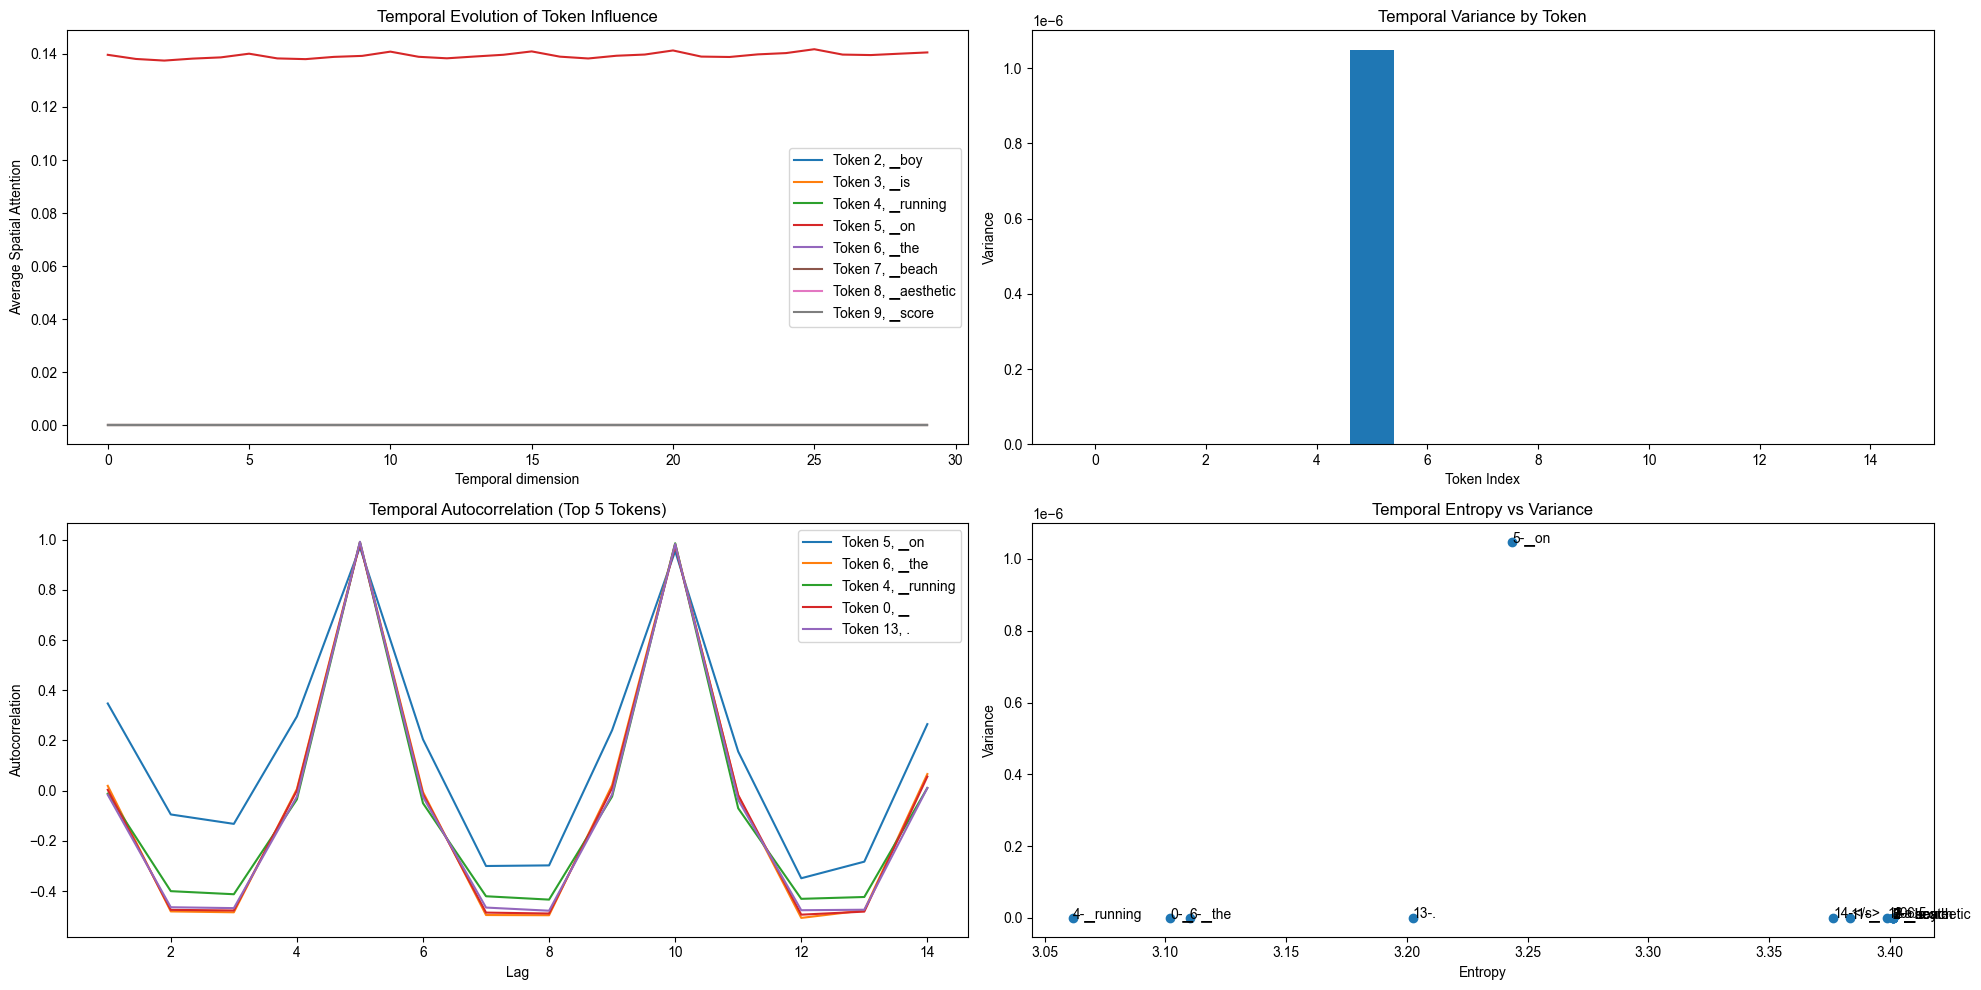

In [10]:
def analyze_temporal_token_influence(attention_tensor):
    T, H, W, N = attention_tensor.shape
    
    spatial_mean = np.mean(attention_tensor, axis=(1, 2))  # Shape: (T, N)
    
    temporal_variance = np.var(spatial_mean, axis=0)
    
    autocorr = np.zeros((N, T//2))
    for token in range(N):
        for lag in range(1, T//2):  # Start from lag 1
            series = spatial_mean[:, token]
            # Ensure proper array shapes for correlation
            autocorr[token, lag] = np.corrcoef(series[:-lag], series[lag:])[0,1]
    
    temporal_entropy = np.zeros(N)
    for token in range(N):
        prob_dist = spatial_mean[:, token] - np.min(spatial_mean[:, token])
        prob_dist = prob_dist / (np.sum(prob_dist) + 1e-10)
        temporal_entropy[token] = stats.entropy(prob_dist + 1e-10)

    fig = plt.figure(figsize=(20, 10))
    
    plt.subplot(2, 2, 1)
    for token in range(2, min(N, 10)):  # Plot first 5 tokens
        plt.plot(range(T), spatial_mean[:, token], label=f'Token {token}, {tokens[token]}')
    plt.title('Temporal Evolution of Token Influence')
    plt.xlabel('Temporal dimension')
    plt.ylabel('Average Spatial Attention')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.bar(range(N), temporal_variance)
    plt.title('Temporal Variance by Token')
    plt.xlabel('Token Index')
    plt.ylabel('Variance')
    
    plt.subplot(2, 2, 3)
    top_tokens = np.argsort(-temporal_variance)[:5]
    for token in top_tokens:
        plt.plot(range(1, T//2), autocorr[token, 1:], label=f'Token {token}, {tokens[token]}')
    plt.title('Temporal Autocorrelation (Top 5 Tokens)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.scatter(temporal_entropy, temporal_variance)
    for i in range(N):
        plt.annotate(f'{i}-{tokens[i]}', (temporal_entropy[i], temporal_variance[i]))
    plt.title('Temporal Entropy vs Variance')
    plt.xlabel('Entropy')
    plt.ylabel('Variance')
    
    plt.tight_layout()
    return {
        'spatial_mean': spatial_mean,
        'temporal_variance': temporal_variance,
        'autocorr': autocorr,
        'temporal_entropy': temporal_entropy
    }

attention_map = torch.load(os.path.join(attention_map_path, sorted_filenames[1625]), map_location=torch.device('cpu')).float()
attention_map = attention_map[..., :attention_map.shape[2] // 2, :token_length // 2]
attention_map = attention_map.reshape(1, 16, 30, 45, 80, token_length // 2)
attention_map = attention_map[0]
attention_map = attention_map.mean(dim=0)
results = analyze_temporal_token_influence(attention_map.numpy())
plt.show()

In [ ]:
def visualize_temporal_influence(attention_tensor):
    T, H, W, N = attention_tensor.shape
    
    # Calculate spatial average
    spatial_mean = np.mean(attention_tensor, axis=(1, 2))  # (T, N)
    
    # Calculate temporal variance for each token
    temporal_var = np.var(spatial_mean, axis=0)
    
    # Calculate temporal gradient (rate of change)
    temporal_grad = np.mean(np.abs(np.diff(spatial_mean, axis=0)), axis=0)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), height_ratios=[2, 1])
    
    # 1. Heatmap of temporal attention patterns
    # remove the last token
    sns.heatmap(spatial_mean[:, :-1], ax=ax1, cmap='YlOrRd', 
                xticklabels=[tokens[i] for i in range(N-1)], yticklabels=range(0, T))
    ax1.set_xlabel('Token Index')
    ax1.set_ylabel('Time Step')
    ax1.set_title('Temporal Attention Patterns')
    
    # 2. Combined bar plot of variance and gradient
    x = np.arange(N)
    width = 0.35
    
    # Normalize metrics for comparison
    norm_var = temporal_var / np.max(temporal_var)
    norm_grad = temporal_grad / np.max(temporal_grad)
    
    ax2.bar(x - width/2, norm_var, width, label='Temporal Variance')
    ax2.bar(x + width/2, norm_grad, width, label='Temporal Gradient')
    
    # Highlight top 5 tokens by combined metric
    combined_score = norm_var + norm_grad
    top_tokens = np.argsort(-combined_score)[:5]
    
    # Add markers for top tokens
    for token in top_tokens:
        ax2.plot(token, max(norm_var[token], norm_grad[token]) + 0.1, 'v', 
                color='red', markersize=10)
        
    ax2.set_xlabel('Token Index')
    ax2.set_ylabel('Normalized Score')
    ax2.set_title('Token Temporal Influence Metrics')
    ax2.legend()
    
    # Add text for top tokens
    txt = "Top temporal tokens: " + ", ".join([f"{i}" for i in top_tokens])
    plt.figtext(0.02, 0.02, txt, fontsize=10)
    
    plt.tight_layout()
    return top_tokens, spatial_mean

filename_index = 1624
attention_map = torch.load(os.path.join(attention_map_path, sorted_filenames[filename_index]), map_location=torch.device('cpu')).float()
print(os.path.join(attention_map_path, sorted_filenames[filename_index]), len(sorted_filenames))
# TODO: different blocks number, whether the important tokens will change
# key tokens: and, before, after, boy, <man>, <objects>

# attention_map = attention_map[..., :attention_map.shape[2] // 2, :token_length // 2]
# attention_map = attention_map.reshape(1, 16, 30, 45, 80, token_length // 2)
# attention_map = attention_map[0]
# attention_map = attention_map.mean(dim=0)
# results = visualize_temporal_influence(attention_map.numpy())

print(attention_map.shape)
attention_map = attention_map[:attention_map.shape[0] // 2, :token_length // 2]
attention_map = attention_map.reshape(1, 30, 45, 80, token_length // 2)
attention_map = attention_map[0]
results = visualize_temporal_influence(attention_map.numpy())

plt.show()
plt.close()

tensor_list = []
for filename_index in range(0, 1680, 1):
    if filename_index != 1678:
        continue
    attention_map = torch.load(os.path.join(attention_map_path, sorted_filenames[filename_index]), map_location=torch.device('cpu')).float()
    print(os.path.join(attention_map_path, sorted_filenames[filename_index]), len(sorted_filenames))
    attention_map = attention_map[:attention_map.shape[0] // 2, :token_length // 2]
    attention_map = attention_map.reshape(1, 30, 45, 80, token_length // 2)
    attention_map = attention_map[0]
    results = visualize_temporal_influence(attention_map.numpy())
    plt.savefig(f"/home/stud/ghuang/Open-Sora/z/{filename_index}.png")
    plt.show()
    plt.close()

    attention_map = attention_map.mean(dim=(0, 1, 2))
    tensor_list.append(attention_map[:-1])
result = torch.stack(tensor_list)
# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), height_ratios=[2, 1])
sns.heatmap(result, ax=ax1, cmap='YlOrRd', 
            xticklabels=[tokens[i] for i in range(len(tokens) - 1)], yticklabels=range(0, 30))
ax1.set_xlabel('Token Name')
ax1.set_ylabel('Denoising Step')
ax1.set_title('token influence across the denoising process')
create_gif_matplotlib("/home/stud/ghuang/Open-Sora/z/", "/home/stud/ghuang/Open-Sora/z/z.gif")

['▁', 'a', '▁boy', '▁is', '▁running', '▁on', '▁the', '▁beach', '▁aesthetic', '▁score', ':', '▁', '6.5', '.', '</s>']


array([[7.75350094, 7.78691769, 7.78803158, 7.75632763, 7.72609901,
        7.78466225, 7.7882719 , 7.77560616, 7.71424723, 7.76781845,
        7.78274727, 7.70185947, 7.78843212, 7.80078602, 7.69778681,
        7.81017637, 7.79831982, 7.78960896, 7.79040909, 7.78850031,
        7.82217216, 7.75481606, 7.79195595, 7.69594002, 7.70587635,
        7.81944752, 7.65633297, 7.59587193, 7.70840216, 7.6397171 ],
       [6.85287285, 7.11093616, 6.87774277, 7.00234222, 7.01867867,
        7.06415081, 7.14763212, 7.19257069, 6.87019014, 7.23260784,
        7.34481907, 7.26542044, 7.2972517 , 6.80527782, 7.29971027,
        7.3467865 , 7.28036976, 7.2416172 , 7.20940828, 7.28680658,
        7.3233757 , 7.22838116, 7.27816582, 7.0892086 , 6.8466711 ,
        7.37170267, 7.28610802, 7.31011486, 7.25407171, 6.72509575],
       [7.69058132, 7.41978931, 6.52192497, 6.58159733, 5.56334019,
        7.69339514, 7.41187477, 5.98184872, 6.65728855, 6.27993298,
        7.65551281, 5.93474007, 6.03851986, 5.

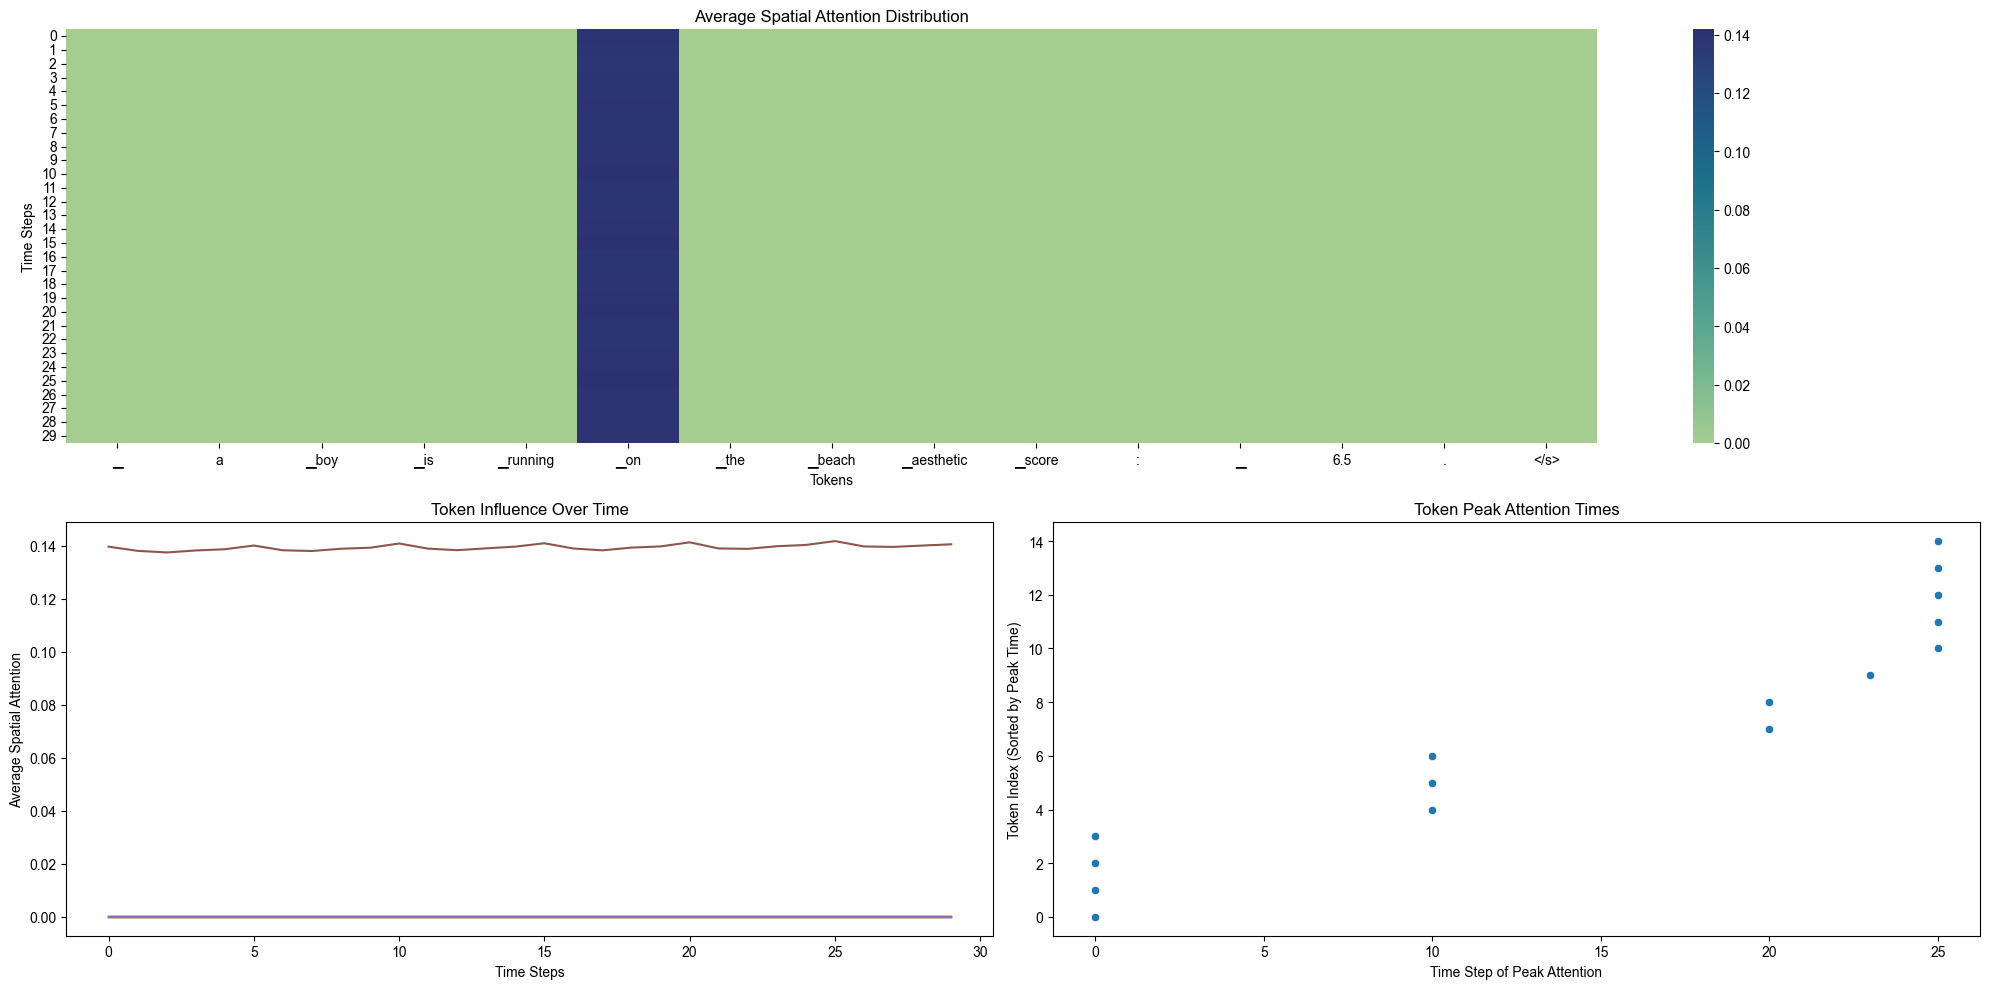

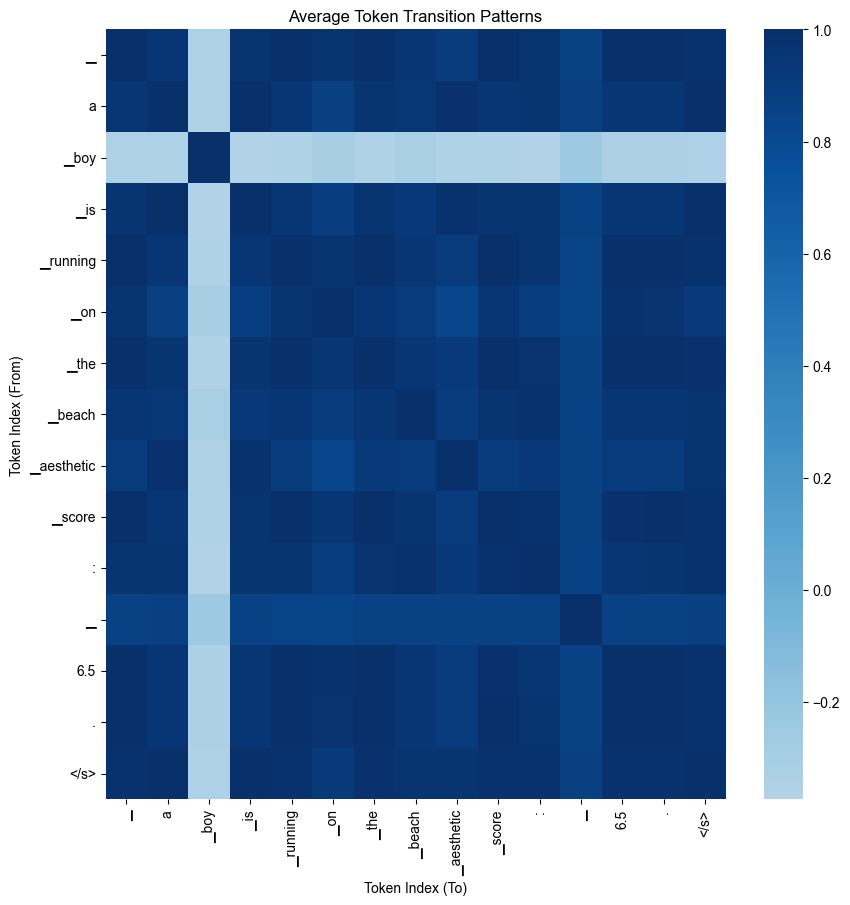

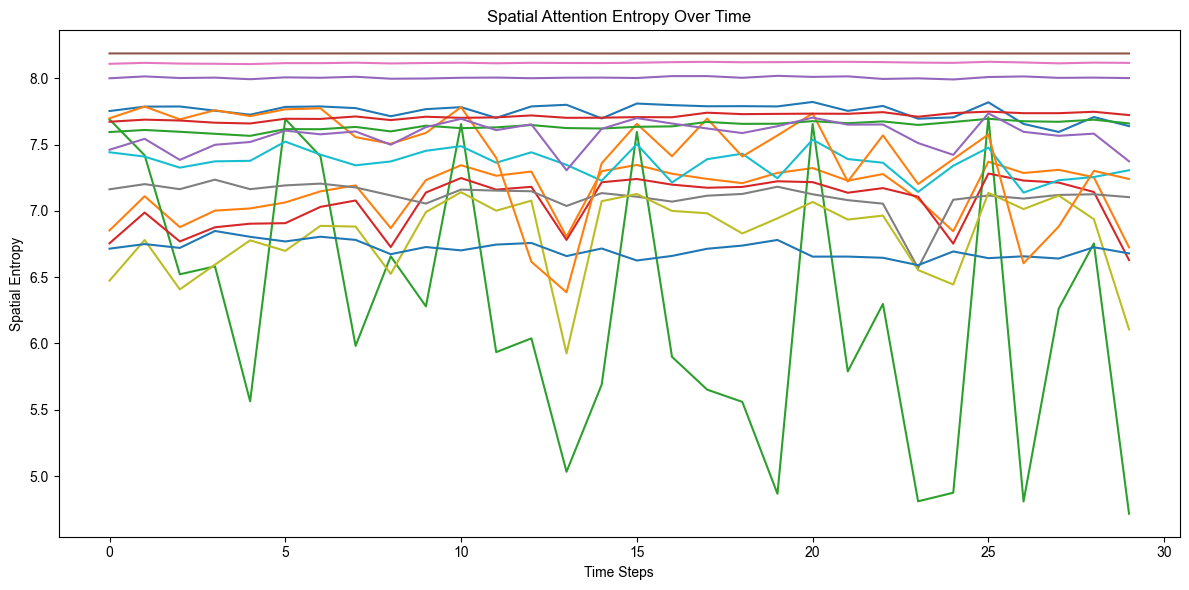

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import torch

def analyze_temporal_attention(attention_tensor, tokens=None):
    # Convert to numpy if tensor
    if torch.is_tensor(attention_tensor):
        attention_tensor = attention_tensor.detach().cpu().numpy()
    
    # Average attention over spatial dimensions
    temporal_attention = attention_tensor.mean(axis=(1, 2))  # Shape: (T, N)
    
    # Transpose to get (T, N) for visualization
    # temporal_attention = temporal_attention.T  # Shape: (T, N)
    
    # Create visualization subplots
    fig = plt.figure(figsize=(20, 10))
    gs = plt.GridSpec(2, 2)
    
    # 1. Temporal Attention Heatmap
    ax1 = fig.add_subplot(gs[0, :])
    sns.heatmap(temporal_attention, 
                cmap='crest',
                xticklabels=tokens if tokens else range(temporal_attention.shape[1]),
                yticklabels=range(temporal_attention.shape[0]),
                ax=ax1)
    ax1.set_title('Average Spatial Attention Distribution')
    ax1.set_xlabel('Tokens')
    ax1.set_ylabel('Time Steps')
    
    # 2. Token Influence Timeline
    print(tokens)
    ax2 = fig.add_subplot(gs[1, 0])
    for token_idx in range(temporal_attention.shape[1]):
        token_profile = temporal_attention[:, token_idx]
        plt.plot(token_profile, label=f'Token {tokens[token_idx] if tokens else token_idx}')
    ax2.set_title('Token Influence Over Time')
    ax2.set_xlabel('Time Steps')
    ax2.set_ylabel('Average Spatial Attention')
    if temporal_attention.shape[1] <= 10:  # Only show legend if not too cluttered
        ax2.legend()
    
    # 3. Temporal Order Analysis
    ax3 = fig.add_subplot(gs[1, 1])
    
    # Calculate peak attention time for each token, Shows when each token has its strongest influence
    peak_times = temporal_attention.argmax(axis=0)
    sorted_indices = np.argsort(peak_times)
    
    # Plot temporal ordering
    sns.scatterplot(x=peak_times[sorted_indices], 
                   y=range(len(peak_times)),
                   ax=ax3)
    ax3.set_title('Token Peak Attention Times')
    ax3.set_xlabel('Time Step of Peak Attention')
    ax3.set_ylabel('Token Index (Sorted by Peak Time)')
    
    plt.tight_layout()
    return fig

def analyze_token_transitions(attention_tensor, tokens, window_size=5):
    '''
    The Average Token Transition Patterns visualization is a heatmap that shows how different 
    tokens influence each other over time, essentially capturing the temporal relationships between tokens.
    High values mean strong correlation.
    Examples:
        Token 1: "pick up"
        Token 2: "put down"
        → Red cell shows these are strongly related in sequence, ie, one follows another(dependent on the window size)

        Token 1: "accelerate"
        Token 2: "brake"
        → Blue cell shows these actions tend to not happen simultaneously

        Token: "walking"
        → Bright spot on diagonal means this action maintains influence over time
        → Suggests continuous action

        Token: "jump"
        → Dim diagonal suggests momentary action
        → Doesn't persist over time because jump is a very shot movement
    Interesting Patterns:
        Pattern: Strong off-diagonal elements
        Meaning: Actions that influence each other with a time delay
        Example: "serve food" following "cook food" after some time

        Pattern: Regular bands of correlation
        Meaning: Repeating sequences of actions
        Example: Walk → Run → Jump → Walk → Run → Jump
    Wrong and Warning Patterns:
        Problem: Related actions showing no correlation
        Example: "open door" and "enter room" showing no relationship

        Problem: Strong correlation between unrelated actions
        Example: "sleep" and "run" showing strong positive correlation

        Problem: Random, scattered correlations
        Meaning: Model might not have learned proper temporal relationships
    '''
    # Average over spatial dimensions
    temporal_attention = attention_tensor.mean(axis=(1, 2))  # Shape: (N, T)
    # temporal_attention = temporal_attention.T  # Shape: (T, N)
    
    # Calculate transition matrices for sliding windows
    n_windows = len(temporal_attention) - window_size + 1
    transition_matrices = []
    
    for i in range(n_windows):
        window = temporal_attention[i:i+window_size]
        # Calculate token-to-token influence in this window
        transition_matrix = np.corrcoef(window.T)
        transition_matrices.append(transition_matrix)
    
    # Average transition matrix
    avg_transition = np.mean(transition_matrices, axis=0)
    
    # Visualize
    plt.figure(figsize=(10, 10))
    sns.heatmap(avg_transition, cmap='Blues', center=0, xticklabels=tokens, yticklabels=tokens)
    plt.title('Average Token Transition Patterns')
    plt.xlabel('Token Index (To)')
    plt.ylabel('Token Index (From)')
    
    return avg_transition

def analyze_spatial_temporal_patterns(attention_tensor):
    """
    Shows how focused or dispersed each token's attention is across the spatial dimensions
    """
    # Convert to numpy if tensor
    if torch.is_tensor(attention_tensor):
        attention_tensor = attention_tensor.detach().cpu().numpy()
    
    n_timesteps, height, width, n_tokens = attention_tensor.shape
    
    # Calculate spatial attention entropy over time for each token
    spatial_entropy = np.zeros((n_tokens, n_timesteps))
    
    for token in range(n_tokens):
        for t in range(n_timesteps):
            # Flatten spatial dimensions
            spatial_dist = attention_tensor[t, ..., token].flatten()
            # Normalize
            spatial_dist = spatial_dist / spatial_dist.sum()
            # Calculate entropy
            spatial_entropy[token, t] = entropy(spatial_dist)
    
    # Visualize spatial entropy over time
    plt.figure(figsize=(12, 6))
    for token in range(n_tokens):
        plt.plot(spatial_entropy[token], label=f'Token {token}' if token < 10 else '')
    plt.title('Spatial Attention Entropy Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Spatial Entropy')
    if n_tokens <= 10:
        plt.legend()
    plt.tight_layout()
    
    return spatial_entropy

attention_map = torch.load(os.path.join(attention_map_path, sorted_filenames[1625]), map_location=torch.device('cpu')).float()
attention_map = attention_map[..., :attention_map.shape[2] // 2, :token_length // 2]
attention_map = attention_map.reshape(1, 16, 30, 45, 80, token_length // 2)
attention_map = attention_map[0]
attention_map = attention_map.mean(dim=0)

analyze_temporal_attention(attention_map, tokens)
analyze_token_transitions(attention_map, tokens, window_size=3)
analyze_spatial_temporal_patterns(attention_map)

0it [00:00, ?it/s]

torch.Size([216000, 36])


1it [00:00,  3.43it/s]


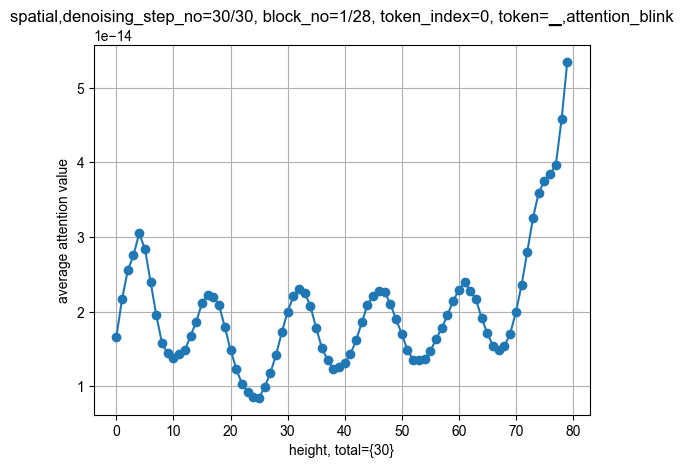

In [18]:
os.system("rm -rf /home/stud/ghuang/Open-Sora/z/*")
start_number = 1625
end_number = 6000
step = 56
token_index = 0
for i, name in tqdm(enumerate(sorted_filenames[start_number:end_number:step])): # 28 depths, each level has one temporal block and one spatial block.
    attention_map = torch.load(os.path.join(attention_map_path, name), map_location=torch.device('cpu')).float()
    print(attention_map.shape)

    # attention_map = attention_map[..., :attention_map.shape[2] // 2, :token_length // 2]
    # attention_map = attention_map.reshape(1, 16, 30, 45, 80, token_length // 2)
    # attention_map = attention_map[0]
    # attention_map = attention_map.mean(dim=0) # average across heads

    attention_map = attention_map[:attention_map.shape[0] // 2, :token_length // 2]
    attention_map = attention_map.reshape(30, 45, 80, token_length // 2)

    prefix = f"spatial,denoising_step_no={start_number//56 + 1}/30, block_no={1}/28, token_index={token_index}, token={tokens[token_index - token_length // 2]},"
    start_number += step
    attention_map = attention_map[..., token_index]

    attention_map_list = []
    # attention_map_list.append(attention_map.mean(dim=0))
    # for tensor_index in range(attention_map.shape[0]):
    #     attention_map_list.append(attention_map[tensor_index])
    # create_gif_denoising_process(attention_map_list, prefix, filename_suffix + "_" + str(token_index) + "_" + str(i))

    # attention_map = attention_map.mean(dim=0)
    # attention_map = attention_map[15]
    averages = attention_map.mean(dim=(0, 1))
    x = np.arange(len(averages))
    plt.figure()
    plt.plot(x, averages.numpy(), '-o')
    # plt.xticks(ticks=x)
    plt.title(prefix + "attention_blink")
    plt.xlabel("height, total={30}")
    plt.ylabel("average attention value")
    plt.grid(True)

    # Save the plot as an image file
    plt.savefig("/home/stud/ghuang/Open-Sora/z/" + filename_suffix + "_" + str(token_index) + "_" + str(i) + "_blink.png", dpi=300, bbox_inches="tight")  # Save with high resolution


    attention_map_list.clear()

In [14]:
prefix = "timestep_embedding"
filename_suffix = "timestep_embedding"

attention_map = torch.load("/home/stud/ghuang/Open-Sora/z_positional_embedding19-20-37-163727.pt", map_location=torch.device('cpu')).float()
attention_map = attention_map.reshape(45, 80, 1152)
attention_map = attention_map.reshape(3600, 1152)[:160]
tensor_list = []
for i in range(1152):
    tensor_list.append(attention_map[..., i])
# create_array_gif(tensor_list)



for hidden_dimension_index in range(1152):
    attention_map = torch.load("/home/stud/ghuang/Open-Sora/z_positional_embedding19-20-37-163727.pt", map_location=torch.device('cpu')).float()
    attention_map = attention_map.reshape(45, 80, 1152)
    attention_map = attention_map[..., hidden_dimension_index]
    attention_map = attention_map.reshape(3600)[:100]
    averages = attention_map
    x = np.arange(len(averages))
    plt.figure()
    plt.plot(x, averages.numpy(), '-o')
    # plt.xticks(ticks=x)
    plt.title(f"z_positional_embedding visualization, hidden_dimension_index={hidden_dimension_index}")
    plt.xlabel("length(first 160), total=3600=45x80")
    plt.ylabel("value")
    plt.grid(True)
    plt.savefig("/home/stud/ghuang/Open-Sora/z/" + filename_suffix + "_" + str(hidden_dimension_index) + "_blink.png", dpi=300, bbox_inches="tight")
    plt.close()


KeyboardInterrupt: 